## ADD SOME PROJECT INTRODUCTION

Loading the libraries and the dataset

In [1]:
# importing the libraries

import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# libraries for data and statistical modeling
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.stats import pearsonr,spearmanr,f_oneway,chi2_contingency

In [2]:
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')


shg_df.head(3)



,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0


## DATA WRANGLING

DATA WRANGLING
Strategy:

drop unwanted columns
handle conflicting datatypes
check and handle null values
generate some new columns for more context.

In [3]:
shg_df.columns

Index(['Booking ID', 'Hotel', 'Booking Date', 'Arrival Date', 'Lead Time',
       'Nights', 'Guests', 'Distribution Channel', 'Customer Type', 'Country',
       'Deposit Type', 'Avg Daily Rate', 'Status', 'Status Update',
       'Cancelled (0/1)', 'Revenue', 'Revenue Loss'],
      dtype='object')

## Data Visualisation


Subplots of Demographic Variables
Subplots of scatter chart
Distribution plot for continous variables

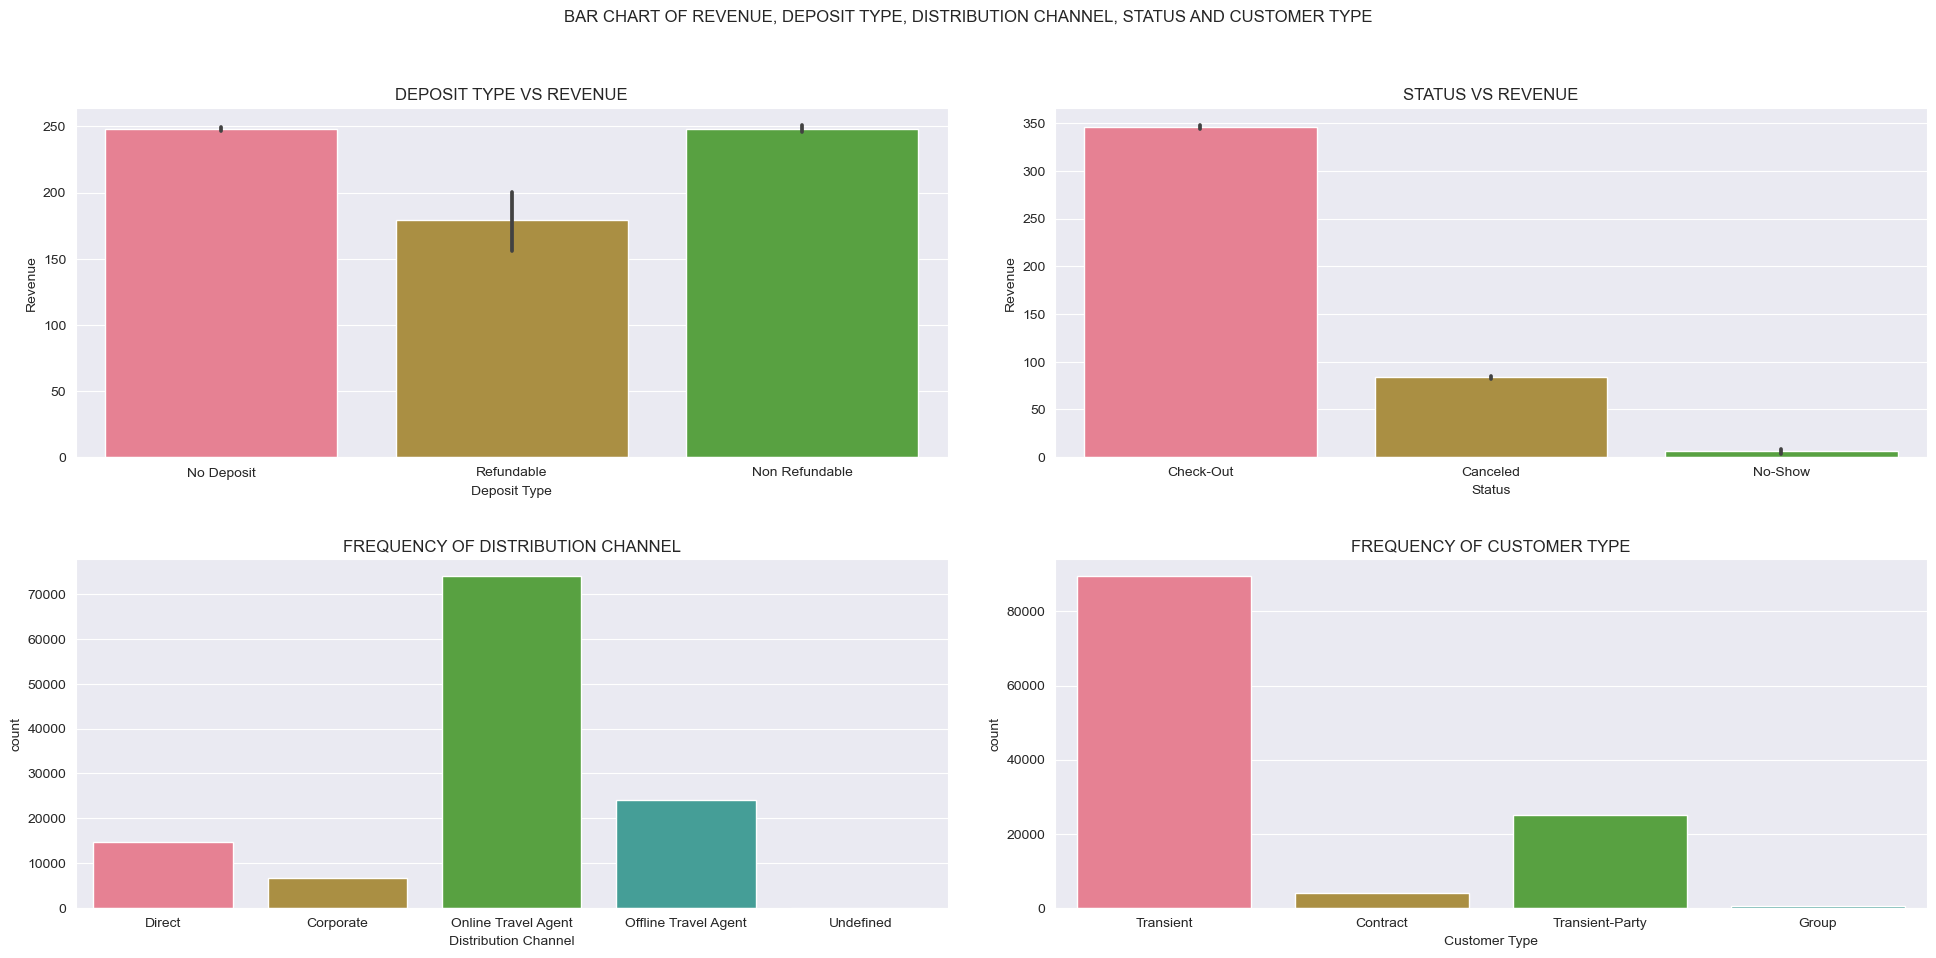

In [4]:
sns.set_style('darkgrid')
sns.set_palette('husl')


fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.barplot(data= shg_df, x = 'Deposit Type', y = 'Revenue', ax=axes[0,0])
sns.barplot(data= shg_df, x = 'Status', y = 'Revenue', ax=axes[0,1])
sns.countplot(data= shg_df, x = 'Distribution Channel', ax=axes[1,0])
sns.countplot(data= shg_df, x = 'Customer Type', ax=axes[1,1])

axes[0,0].set_title('DEPOSIT TYPE VS REVENUE')
axes[0,1].set_title('STATUS VS REVENUE')
axes[1,0].set_title('FREQUENCY OF DISTRIBUTION CHANNEL')
axes[1,1].set_title('FREQUENCY OF CUSTOMER TYPE')

plt.suptitle('BAR CHART OF REVENUE, DEPOSIT TYPE, DISTRIBUTION CHANNEL, STATUS AND CUSTOMER TYPE')

fig.tight_layout(pad= 3)

In [5]:
def get_chart(x, y, dim, title):
    
    fig, axes = plt.subplots(dim[0],dim[1], figsize = (20,10))
    sns.barplot(data= shg_df, x = x[0], y = y[0], ax=axes[0,0])
    sns.barplot(data= shg_df, x = x[1], y = y[0], ax=axes[0,1])
    sns.barplot(data= shg_df, x = x[0], y = y[1], ax=axes[1,0])
    sns.barplot(data= shg_df, x = x[1], y = y[1], ax=axes[1,1])

    axes[0,0].set_title(f'{x[0].upper()} VS {y[0].upper()}')
    axes[0,1].set_title(f'{x[1].upper()} VS {y[0].upper()}')
    axes[1,0].set_title(f'{x[0].upper()} VS {y[1].upper()}')
    axes[1,1].set_title(f'{x[1].upper()} VS {y[1].upper()}')
    
    fig.tight_layout(pad=3)


    plt.suptitle(title)

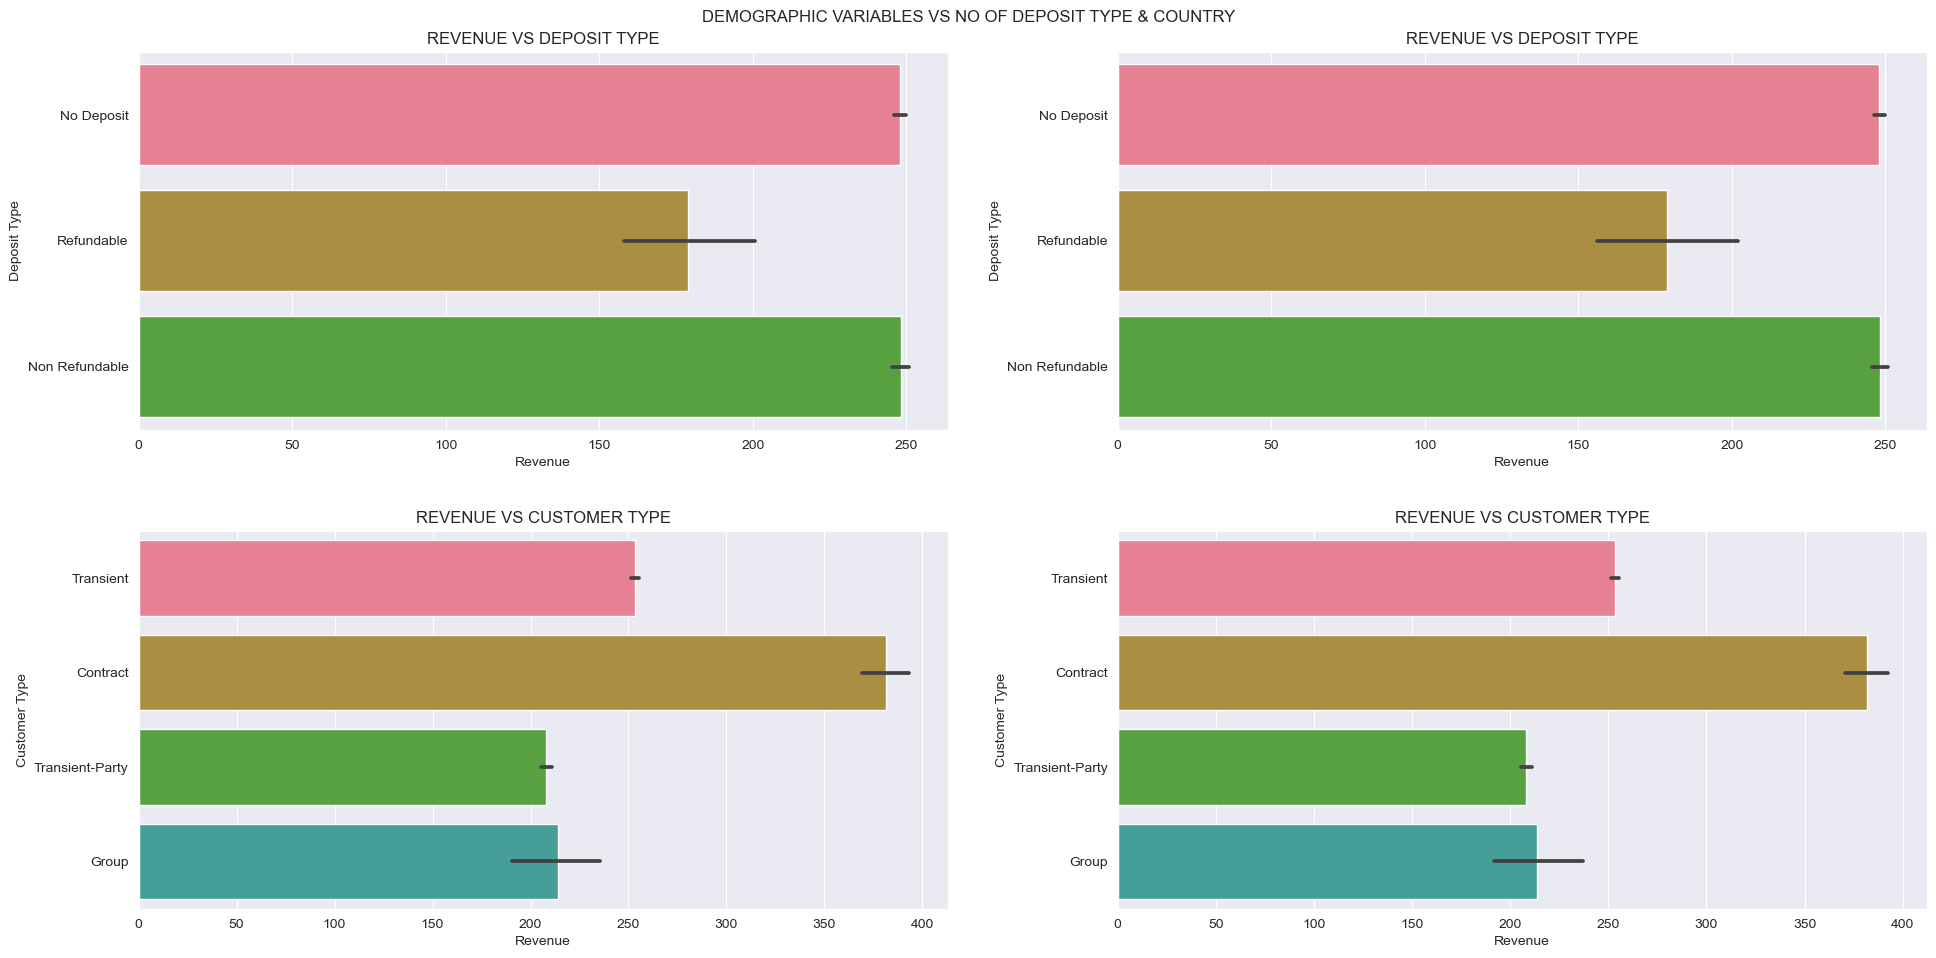

In [6]:
get_chart(x = ['Revenue', 'Revenue'],
          y = ['Deposit Type', 'Customer Type'],
          dim= [2,2],
          title= 'DEMOGRAPHIC VARIABLES VS NO OF DEPOSIT TYPE & COUNTRY')

## INSPECT CORRELATION
Correlation measures the relationship between two or more continuous variables

<Axes: >

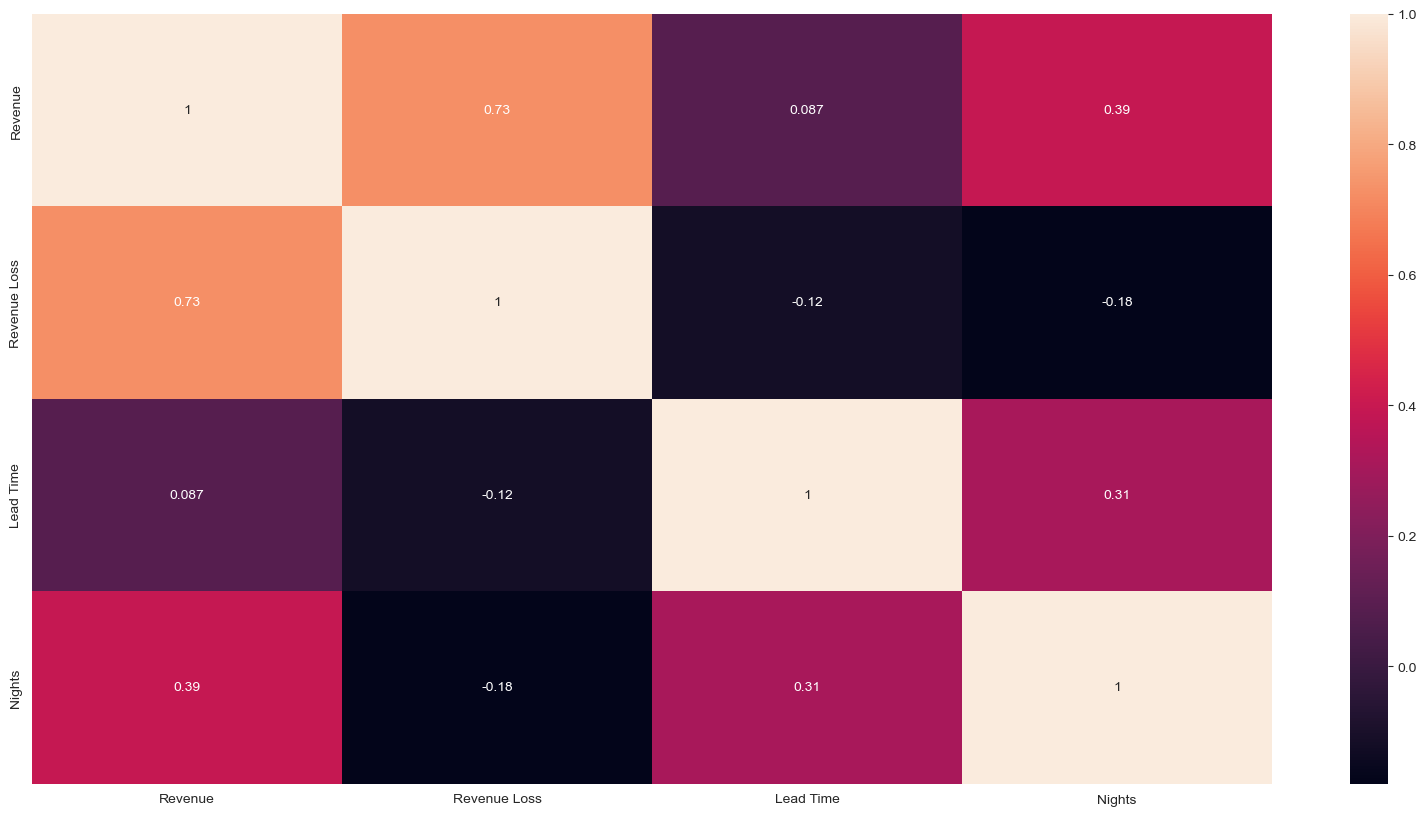

In [7]:
corr_matrix = shg_df[['Revenue', 'Revenue Loss','Lead Time','Nights',]].corr(method='spearman')

fig = plt.figure(figsize=(20,10))
sns.heatmap(data=corr_matrix, annot= True)


## Dimensionality Reduction

In [8]:
shg_df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,196.0,0.0


In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le_encoder = LabelEncoder()
one_encoder = OneHotEncoder()

shg_df['Hotel'] = le_encoder.fit_transform(shg_df['Hotel'])
shg_df['Hotel']

0         1
1         1
2         1
3         1
4         1
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: Hotel, Length: 119390, dtype: int32

In [10]:
shg_df['Customer Type'] = ['transient' if x == 'Transient'
                              else 'contract' if x == 'Contract' else 'group' if x == 'Group'
                              else 'group' for x in shg_df['Customer Type']]

In [11]:
shg_df['Customer Type'].unique()

array(['transient', 'contract', 'group'], dtype=object)

In [12]:
numbers = [101,122,323,412,655,667,780,1008,7670]

empty = []

for num in numbers:
    if num % 2 == 0:
        empty.append(num)
        
print(empty)

[122, 412, 780, 1008, 7670]


In [13]:
[x for x in numbers if x % 2 == 0]
['odd' if x % 2 !=0 else 'even' for x in numbers]

['odd', 'even', 'odd', 'even', 'odd', 'odd', 'even', 'even', 'even']

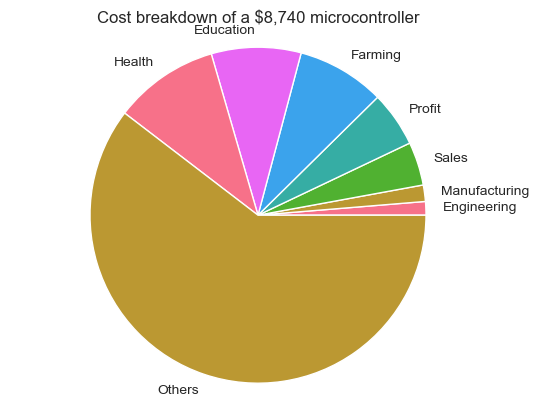

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline


sizes = [101,122,323,412,655,667,782,4670]
labels = 'Engineering', 'Manufacturing', 'Sales', 'Profit','Farming','Education','Health','Others'


plt.pie(sizes,
       labels = labels)

plt.title('Cost breakdown of a $8,740 microcontroller')
plt.axis('equal')


plt.show()


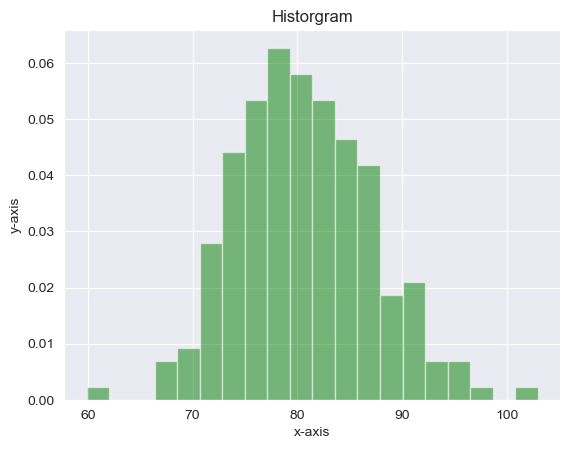

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline


mu = 80
sigma = 7
x = np.random.normal(mu, sigma, size=200)


plt.hist(x, 20,
         density=True,
         histtype='bar',
         facecolor='g',
         alpha=0.5)

plt.title('Historgram'), plt.xlabel('x-axis'),plt.ylabel('y-axis')

plt.show()

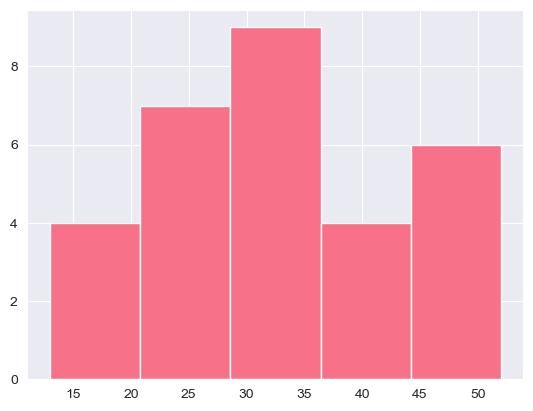

In [16]:
#The next histogram example involves a list of commute times. Suppose the following commute times were recorded in a survey:

23, 25, 40, 35, 36, 47, 33, 28, 48, 34,
20, 37, 36, 23, 33, 36, 20, 27, 50, 34,
47, 18, 28, 52, 21, 44, 34, 13, 40, 49


import matplotlib.pyplot as plt 
%matplotlib inline


transport_times = [23, 25, 40, 35, 36, 47, 33, 28, 48, 34,
                 20, 37, 36, 23, 33, 36, 20, 27, 50, 34,
                 47, 18, 28, 52, 21, 44, 34, 13, 40, 49]





plt.hist(transport_times, 5)

plt.show()


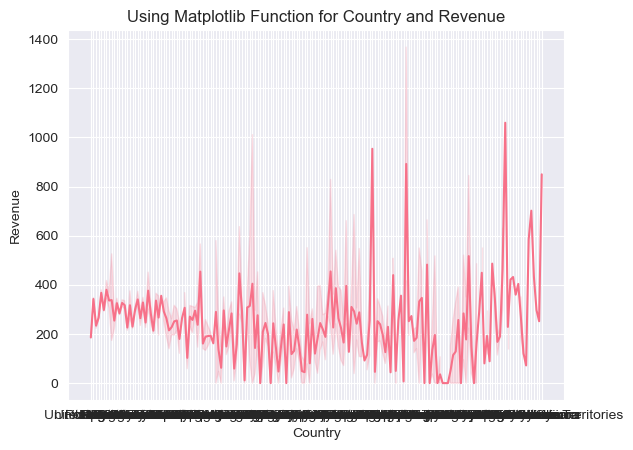

In [17]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')


# draw lineplot
sns.lineplot(x="Country", y="Revenue", data=shg_df)

# setting the title using Matplotlib
plt.title('Using Matplotlib Function for Country and Revenue')

plt.show()


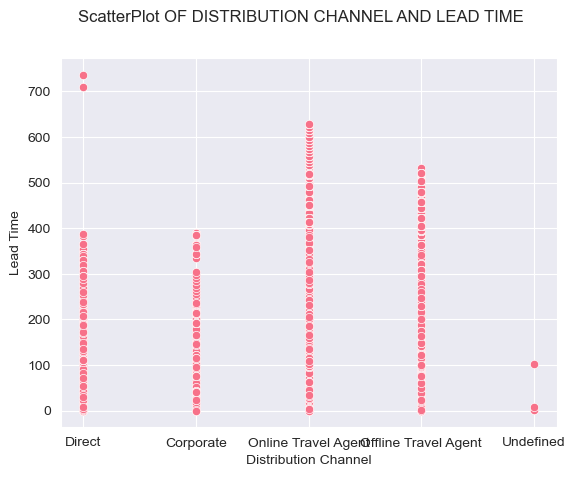

In [18]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')

sns.scatterplot(x='Distribution Channel', y='Lead Time', data=shg_df)

plt.suptitle('ScatterPlot OF DISTRIBUTION CHANNEL AND LEAD TIME')

fig.tight_layout(pad= 3)

plt.show()


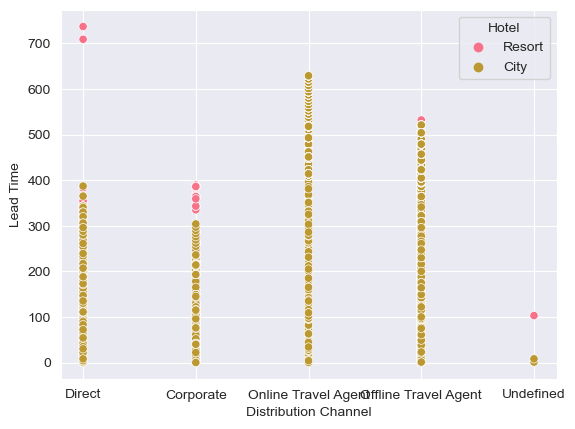

In [19]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')

sns.scatterplot(x='Distribution Channel', y='Lead Time', data=shg_df, hue='Hotel')
plt.show()


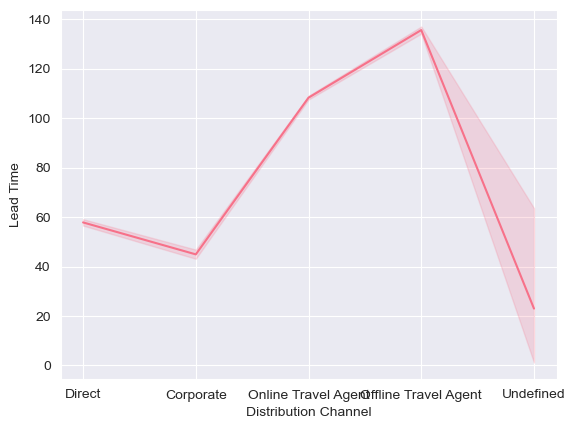

In [20]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')

sns.lineplot(x='Distribution Channel', y='Lead Time', data=shg_df)
plt.show()


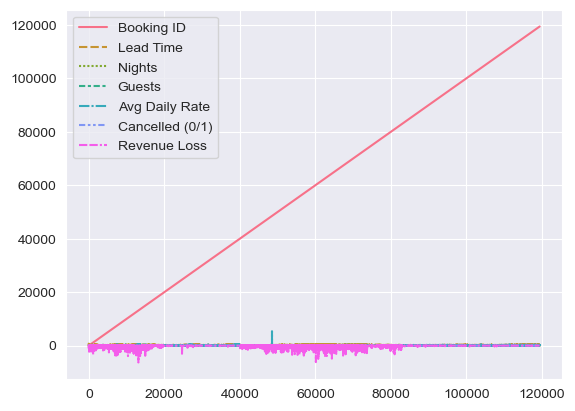

In [21]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')

# using only data attribute
sns.lineplot(data=shg_df.drop(['Revenue'], axis=1))
plt.show()


In [ ]:

# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
 
 
# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')
 
sns.set_style('darkgrid')
sns.set_palette('husl')


fig, axes = plt.subplots(2,2, figsize = (20,10))

sns.barplot(data= shg_df, x = 'Deposit Type', y = 'Revenue', hue='Customer Type', ax=axes[0,0])
sns.barplot(data= shg_df, x = 'Status', y = 'Revenue',hue='Customer Type', ax=axes[0,1])
sns.countplot(data= shg_df, x = 'Distribution Channel',hue='Customer Type', ax=axes[1,0])
sns.countplot(data= shg_df, x = 'Customer Type',hue='Distribution Channel', ax=axes[1,1])


plt.show()

In [ ]:
# importing the modules
from bokeh.plotting import figure, output_file, show
import pandas as pd


# instantiating the figure object
graph = figure(title = "Bokeh Bar Chart")

# reading the database
shg_df = pd.read_excel('SHG_Booking_Data.xlsx', sheet_name='Data')
 
# Count of each unique value of
# tip column
data = shg_df['Revenue'].value_counts()

# plotting the graph
graph.line(shg_df, data['Revenue'])

# displaying the model
show(graph) 
